In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/test.csv')

In [3]:
df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [4]:
import numpy as np
import matplotlib.pyplot as plt


1. Draw the histograms of the two distributions in the sample(2), and state your
inferences(1).
2. Which statistical test would you employ?(2)
3. State the Null and Alternative Hypothesis (1).
4. What statistic do you recommend to apply for this case(2)?
5. State the observed statistic(2)
6. Simulate the test statistic under the Null that will help make the decision(3).
7. Draw a histogram to depict what the model of random selection predicts about the
statistic.(3)
8. Evaluate the empirical p-value of the test(3).
9. What is the outcome of your analysis? (1)

1)

In [5]:
smk_and_bir = df[["Maternal Age", "Maternal Smoker"]]
smk_and_bir

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


In [6]:
smk_and_bir['Maternal Smoker'] == True

0       False
1       False
2        True
3        True
4       False
        ...  
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal Smoker, Length: 1174, dtype: bool

In [7]:
sm = smk_and_bir['Maternal Age'] [smk_and_bir['Maternal Smoker'] == True]
sm

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [8]:
non_sm = smk_and_bir['Maternal Age'] [smk_and_bir['Maternal Smoker'] == False]
non_sm

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3896d89dc0>,
      dtype=object)

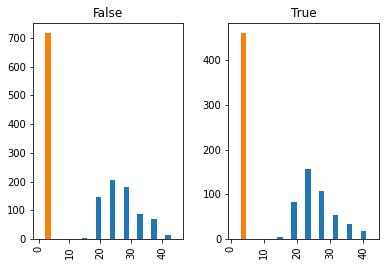

In [9]:
smk_and_bir.hist(by ='Maternal Smoker')

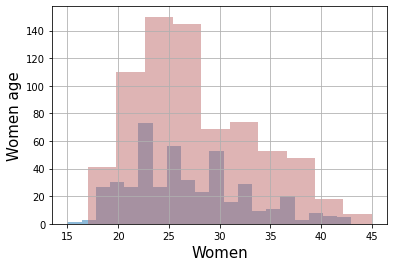

In [10]:
import seaborn as sns
sm.hist(histtype='stepfilled', alpha=.5, bins=20)   
non_sm.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Women',fontsize=15)
plt.ylabel('Women age',fontsize=15)
plt.show()

The weight distribution of babies delivered to smoking moms appears to be slightly to the left of the distribution corresponding to non-smoking mothers. The average birth weight of a baby born to a smoker appears to be lower than that of a baby born to a nonsmoker.

2)

According to the alternate theory, the average birth weight for mothers who smoke is lower when comparing the two groups' typical birth weights. Since there is a reasonable difference between the two group means, we should utilise that statistic as our statistic.


3) NULL HYPOTHESIS: The distribution of baby birth weights in the population is the same for mothers who smoke and mothers who don't. The variation in the sample is a result of chance.

ALTERNATIVE HYPOTHESIS: In the population, infants born to smoking moms often weigh less than infants born to non-smoking mothers.


4)

In [11]:
M_TABLE = smk_and_bir.groupby('Maternal Smoker').mean()
M_TABLE

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


5)OBSERVERD STATISTIC

In [12]:
obser_diff = M_TABLE['Maternal Age'][1] - M_TABLE['Maternal Age'][0]
obser_diff

-0.8076725017901509

6)PREDICTING STASTIC USING NULL HYPOTHESIS

In [13]:
smk_and_bir

,Maternal Age,Maternal Smoker
0,27,False
1,33,False
2,28,True
3,23,True
4,25,False
...,...,...
1169,27,False
1170,24,False
1171,30,True
1172,21,False


In [14]:
Differences = np.zeros(5000)
for i in np.arange(5000):
    smk_and_bir = df[['Maternal Smoker', 'Birth Weight']]
    shuffled = smk_and_bir.sample(1174,replace = False)
    shuffled_weights = shuffled['Birth Weight']
    original_and_shuffled = smk_and_bir.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][0]- all_group_means['shuffled_weights'][1]
    Differences[i] = difference
Differences

array([ 0.54480552,  0.28366622,  0.75586331, ..., -0.82170422,
       -0.03113183, -1.2724378 ])

In [15]:
diff_df = pd.DataFrame(Differences)
diff_df

,0
0,0.544806
1,0.283666
2,0.755863
3,1.270987
4,-0.621378
...,...
4995,-0.653573
4996,-0.170645
4997,-0.821704
4998,-0.031132


7)

Observed Difference: -0.8076725017901509


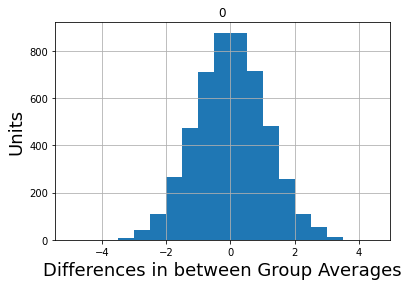

In [16]:
diff_df.hist(bins = np.arange(-5,5,0.5))
plt.xlabel('Differences in between Group Averages',fontsize=18)
plt.ylabel('Units',fontsize=18);
print('Observed Difference:', obser_diff)

8)

In [17]:
p_value = np.count_nonzero(Differences <= obser_diff)/Differences.size
p_value

0.231

9)The empirical P-value is 0.2384, that in 5000 only 1145 samples that are resulted in a difference of -0.8076725017901509 or lower.
We can observe that the value of non smoking mother is a bit to left and p value is less. We can say that the Null hypothesis is rejected